# HW1: Know the data
HW1 introduces you the dataset which will be used for this and other assignments together with some useful preprocessing methods. Later assignments will cover different classification methods.

In [1]:
import os
import sys
sys.path.append("../../homework")

import matplotlib.pyplot as plt
import numpy as np

%load_ext autoreload
%autoreload 2

## USPS
Read [here](https://www.kaggle.com/bistaumanga/usps-dataset) to learn more about the USPS dataset. 

In [2]:
# Load the USPS data
usps_dir = "../data/usps.h5"
import h5py
with h5py.File(usps_dir, 'r') as hf:
        train = hf.get('train')
        trainX = train.get('data')[:]
        trainy = train.get('target')[:]
        test = hf.get('test')
        testX = test.get('data')[:]
        testy = test.get('target')[:]

In [16]:
# Print some statistics about the data
print("train image data shape:", trainX.shape)
print("train label data shape:", trainy.shape)
print("test image data shape:", testX.shape)
print("test label data shape:", testy.shape)

train image data shape: (7291, 256)
train label data shape: (7291,)
test image data shape: (2007, 256)
test label data shape: (2007,)


0

## Flatten the data
The 16x16 USPS images have been flattened as 256 x 1 image vectors.

Flattening the data will lead to some loss of information (such as spatial correlation between pixels) but it is nevertheless useful for training some linear classifiers.

Write some code below to visualize the “flattened” data. From the visualization, is “flattened data” sufficiently discriminative for classification purposes? Please provide a brief explanation.

Text(0.5, 0.92, 'Figure1.Flatten data visuilization')

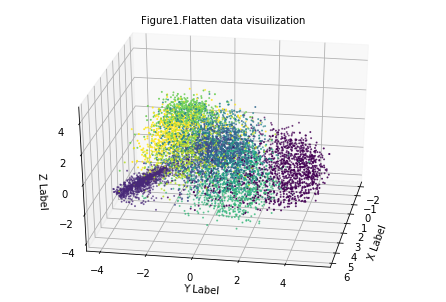

In [182]:
#####################################################################
# TODO:                                                             #
# Visualize the data to illustrate that the flattened data is still #
# good for classification                                           #
#####################################################################
import numpy as np
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt
# PCA
train_mean = np.mean(trainX,axis=-1,keepdims=True)
X = trainX - train_mean
S = X.T.dot(X)
_,D,Vh = np.linalg.svd(S)
trainV = trainX.dot(Vh.T[:,:3])
# Visualize
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(trainV[:,0],trainV[:,1],trainV[:,2],s=1, c=trainy)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.view_init(30, 10)
plt.title('Figure1.Flatten data visuilization', fontsize=10)
#####################################################################
#                       END OF YOUR CODE                            #
#####################################################################

**The "flattened data" is sufficiently discrimitive for classification purpose!**

From the Figure.1, the data points with the same labels cluster together, which is obviously seperable.

## A few more visualization exercises

Please complete the following to get a better understanding of the USPS data:

**a.** Plot "average" images of digits 0-9 in one figure. What does this show or represent?

**b.** Subtract the average pixel value computed from all training samples and then re-plot the above “average" images. How are these images useful?

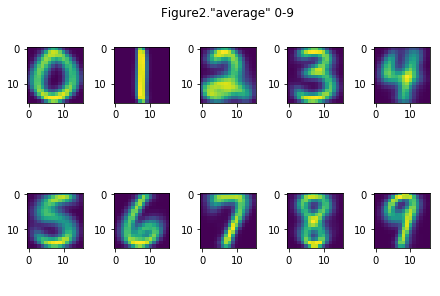

In [200]:
#####################################################################
# TODO:                                                             #
# Plot each "average image" of digits 0-9                           #
#####################################################################
# Plot "average" images 0-9
means = {i:None for i in range(10)}

fig2 = plt.figure(constrained_layout=True)
spec2 = gridspec.GridSpec(2, 5, figure=fig2)
plt.title('Figure2."average" 0-9')
plt.axis('off')
for i in range(10):
    means[i] = np.mean(trainX[np.where(trainy==i)[0],:],axis=0) 
    fig2.add_subplot(spec2[i//5, i%5])
    plt.imshow(means[i].reshape(16,16))
#####################################################################
#                       END OF YOUR CODE                            #
#####################################################################

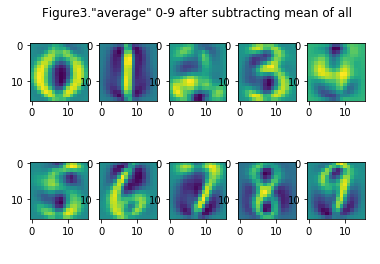

In [202]:
#####################################################################
# TODO:                                                             #
# Plot the "average" images of digits 1~9 in one figure             #
# (this time with average pixel values subtracted)                  #
#####################################################################
# Ploat ava.0-9 after subtracting mean of all
trainX_mean = np.mean(trainX,axis=0,keepdims=True)
X = trainX - trainX_mean
means = {i:None for i in range(10)}

fig3 = plt.figure(constrained_layout=True)
spec3 = gridspec.GridSpec(2, 5, figure=fig3)
plt.title('Figure3."average" 0-9 after subtracting mean of all')
plt.axis('off')
for i in range(10):
    means[i] = np.mean(X[np.where(trainy==i)[0],:],axis=0) 
    fig3.add_subplot(spec2[i//5, i%5])
    plt.imshow(means[i].reshape(16,16))
#####################################################################
#                       END OF YOUR CODE                            #
#####################################################################

**a**

From the Figure3., we can see it represent the general writing of the digits.

**b**

From the Figure3, we see most of the pixles intend to extreme value comparing figures in the Figure4., which will cause our gradients go out of control easily. 

In your submission, in addition to the completed codes and the resulting images for the visualizations, also provide brief responses to the above questions and a brief analysis of the visualized data. 

You may refer to [here](http://colah.github.io/posts/2014-10-Visualizing-MNIST/) for more interesting and beautiful visualisations. Of course, the methods employed are more complex.